# Fraud Detection for Banking



## Sample Guys

#### Hergen Meyer 
#### Maitha Alshaali 
#### Nafitha Najeeb 
#### Dominique Duclayan  

## Overview

In this project, we are detecting fraudulent transactions from the Banksim dataset that can be found in the link below. 

Source: https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments


### Feature Description

Source: https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments

* Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.

* Customer: This feature represents the customer id

* zipCodeOrigin: The zip code of origin/source.

* Merchant: The merchant's id

* zipMerchant: The merchant's zip code

* Age: Categorized age
    * 0: <= 18,
    * 1: 19-25,
    * 2: 26-35,
    * 3: 36-45,
    * 4: 46:55,
    * 5: 56:65,
    * 6: > 65
    * U: Unknown

* Gender: Gender for customer
    * E : Enterprise,
    * F: Female,
    * M: Male,
    * U: Unknown

* Category: Category of the purchase.

* Amount: Amount of the purchase

* Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)

In [76]:
# (1) Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

#Magic Function 
%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
# (2) Import data file(s)
# Use the SQL method from Spark to import the data as DataFrames. 
# See the reference code below. Also see the DataBricks Fraud Detection code as example.
# For basic exploration, you can also use Pandas.
# bs140513_032310.csv
# bsNET140513_032310.csv

# !curl -O https://storage.googleapis.com/datascience-practice/bs140513_032310.csv.zip
# !curl -O https://storage.googleapis.com/datascience-practice/bsNET140513_032310.csv.zip

In [3]:
# (2.a) See the downloaded files
!ls

EDA_Hergen.ipynb           bsNET140513_032310.csv
README.md                  bsNET140513_032310.csv.zip
bs140513_032310.csv        fraudDetectionEda.ipynb
bs140513_032310.csv.zip    option-9-guide.ipynb


In [4]:
# (2.b) Unzip the files
# !unzip bs140513_032310.csv.zip
# !unzip bsNET140513_032310.csv.zip

In [5]:
# (2.c) Read transaction data into Pandas DataFrame
dft = pd.read_csv('bs140513_032310.csv')
# (2.d) Read network data into Pandas DataFrame
dff = pd.read_csv('bsNET140513_032310.csv')

# Note: the equivalent method for a PySpark DataFrame is
# df = spark.read.csv()

# General Exploration

In [6]:
# (3) Explore data (for example, see what is categorial and numerical)
# Lets start with analysing / comparing dft and dff
dft.head(3)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0


In [7]:
# Checking the columns in our dataset
dft.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [8]:
dft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [9]:
# No missing data. Great!

In [10]:
# Overview of some statistics
dft.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [11]:
# Checking for weird values 
dft['step'].unique

<bound method Series.unique of 0           0
1           0
2           0
3           0
4           0
         ... 
594638    179
594639    179
594640    179
594641    179
594642    179
Name: step, Length: 594643, dtype: int64>

In [12]:
def addlabels (x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+4000, y[i], ha= 'center')
        

In [13]:
def addlabels_1 (x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+4000, y[i], ha= 'center', rotation=90)

Text(0.5, 1.0, 'Fraud frequency')

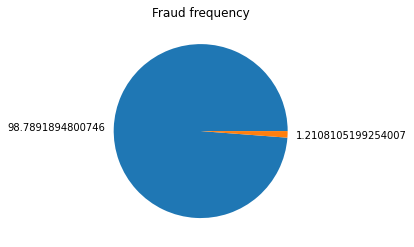

In [14]:
plt.pie(dft['fraud'].value_counts(), labels=[587443*100/(587443+7200), 7200*100/(587443+7200)])
plt.title('Fraud frequency')

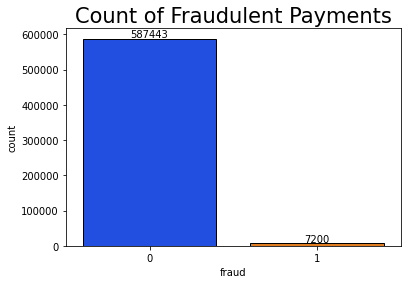

In [15]:
sns.countplot(x="fraud",data=dft,edgecolor="black",palette="bright")
plt.title("Count of Fraudulent Payments",fontsize=21)
addlabels(["0","1"],dft.fraud.value_counts())
plt.show()


In [16]:
fraudCount = dft[['fraud']].value_counts()
print(fraudCount)

# The results show us that there is a total of 587443 non fraudelant transactions 
# that are benign (0) and a total of 7200 fraudelant transactions (1)


fraud
0        587443
1          7200
dtype: int64


In [17]:
# Printing the Number of fraud transactions and non-fraud transactions
print('No. of fraud transactions: {}, No. of non-fraud transactions: {}'.format((dft.fraud == 1).sum(), (dft.fraud == 0).sum()))

No. of fraud transactions: 7200, No. of non-fraud transactions: 587443


In [18]:
percent = dft[['fraud']].value_counts()[1] / len(dft) * 100
percent = percent.round(1)
print("Percentage of fraud cases: {}%".format(percent) )


Percentage of fraud cases: 1.2%


In [19]:
dft.head(1)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0


In [20]:
dff.head(1)

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0


In [21]:
dff[['fraud']].value_counts()


fraud
0        587443
1          7200
dtype: int64

In [22]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Source     594643 non-null  object 
 1   Target     594643 non-null  object 
 2   Weight     594643 non-null  float64
 3   typeTrans  594643 non-null  object 
 4   fraud      594643 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ MB



### I conclude: The DFF dataset can be ignored as it is redundant to DFT


# Feature Analysis

In [23]:
# Fraud cases:
trans_fraud = dft[dft['fraud'] == 1]


In [24]:
# Checking to see the details and number of fraud (1) transactions 
dft.loc[dft.fraud == 1].value_counts()

step  customer       age  gender  zipcodeOri  merchant       zipMerchant  category                 amount   fraud
0     'C1038215695'  '4'  'M'     '28007'     'M2122776122'  '28007'      'es_home'                328.02   1        1
120   'C916694479'   '4'  'F'     '28007'     'M480139044'   '28007'      'es_health'              443.60   1        1
      'C1394467199'  '3'  'M'     '28007'     'M980657600'   '28007'      'es_sportsandtoys'       344.16   1        1
      'C1382187685'  '1'  'F'     '28007'     'M151143676'   '28007'      'es_barsandrestaurants'  134.63   1        1
      'C1294166760'  '3'  'M'     '28007'     'M209847108'   '28007'      'es_wellnessandbeauty'   135.91   1        1
                                                                                                                    ..
59    'C806399525'   '2'  'F'     '28007'     'M980657600'   '28007'      'es_sportsandtoys'       29.22    1        1
                                              'M48013

In [25]:
# Checking to see the details and number of non-fraud (0) transactions 
dft.loc[dft.fraud == 0].value_counts()

step  customer       age  gender  zipcodeOri  merchant       zipMerchant  category                 amount  fraud
0     'C100045114'   '4'  'M'     '28007'     'M348934600'   '28007'      'es_transportation'      35.13   0        1
126   'C1175419672'  '2'  'M'     '28007'     'M1823072687'  '28007'      'es_transportation'      58.11   0        1
      'C1171622243'  '5'  'M'     '28007'     'M151143676'   '28007'      'es_barsandrestaurants'  35.76   0        1
      'C1173530601'  '2'  'M'     '28007'     'M1823072687'  '28007'      'es_transportation'      42.77   0        1
      'C1174105749'  '5'  'M'     '28007'     'M348934600'   '28007'      'es_transportation'      21.85   0        1
                                                                                                                   ..
68    'C1687751654'  '3'  'M'     '28007'     'M1823072687'  '28007'      'es_transportation'      60.55   0        1
      'C1687722078'  '2'  'M'     '28007'     'M1823072687'  

In [26]:
# Checking to see the number of fraud (1) transactions and its correlation with age
dft.loc[dft.fraud == 1,'age'].value_counts()

'2'    2344
'3'    1755
'4'    1410
'1'     689
'5'     686
'6'     261
'0'      48
'U'       7
Name: age, dtype: int64

### step

In [27]:
# dft.groupby('step').describe()['fraud']
dft[['step']].value_counts()


step
175     3774
177     3758
152     3746
178     3743
174     3743
        ... 
5       2525
3       2499
2       2462
0       2430
1       2424
Length: 180, dtype: int64

In [28]:
trans_fraud[['step']].value_counts()


step
0       40
113     40
115     40
116     40
117     40
        ..
61      40
62      40
63      40
64      40
179     40
Length: 180, dtype: int64

In [29]:
# I have not clue what step is .... but it seams, each step holds 40 fraud cases....

### customers

In [30]:
# Unique customers:
print(len(np.unique(dft[['customer']].values)))


4112


### gender

In [31]:
dft1 = pd.DataFrame(dft[ 'gender' ].value_counts())
dft1

,gender
'F',324565
'M',268385
'E',1178
'U',515


In [32]:
# And what about all the other gernders ... LBTQ ... ???? ;-)

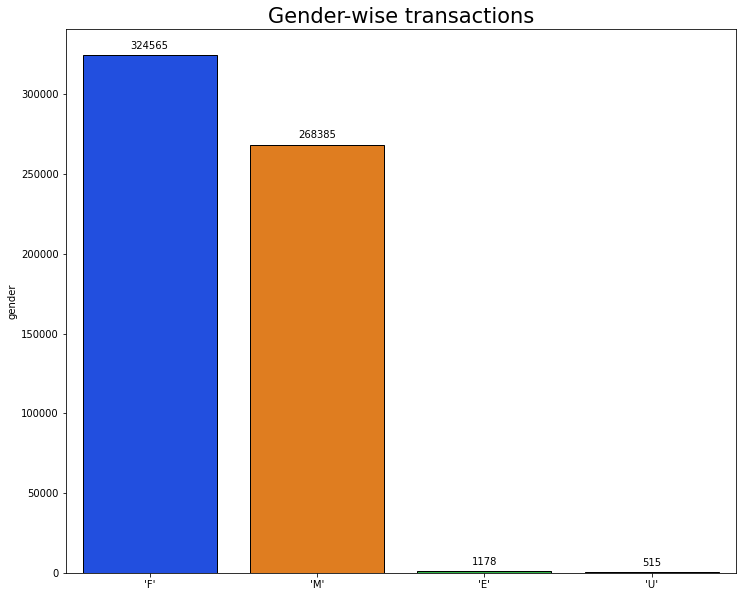

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(dft1.index,dft1.gender,data=dft1,ec="black", palette="bright")
plt.title("Gender-wise transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels(dft1.index,dft1.gender)

In [34]:
# I suggest we ignore E and U

### age

In [35]:
trans_fraud[['age']].value_counts()


age
'2'    2344
'3'    1755
'4'    1410
'1'     689
'5'     686
'6'     261
'0'      48
'U'       7
dtype: int64

In [36]:
dft2 = pd.DataFrame(dft['age'].value_counts())
dft2
# We need to know the meaning of these values    =>    Dany

,age
'2',187310
'3',147131
'4',109025
'5',62642
'1',58131
'6',26774
'0',2452
'U',1178


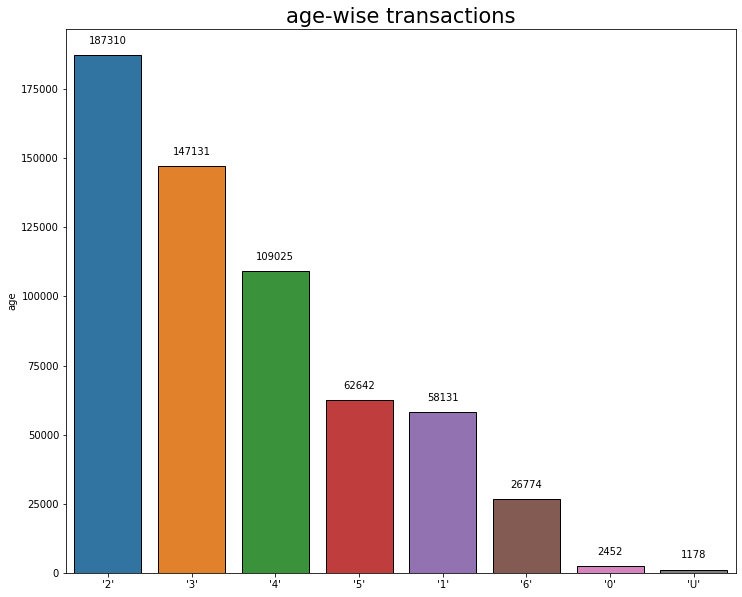

In [37]:
plt.figure(figsize=(12,10))
sns.barplot(dft2.index,dft2.age,data=dft2,ec="black")
plt.title("age-wise transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels(dft2.index,dft2.age)

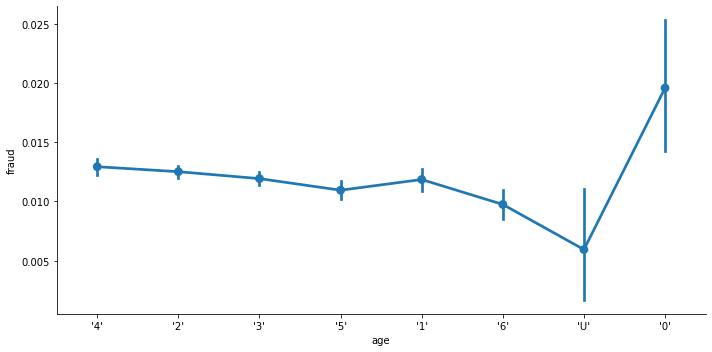

In [38]:


sns.catplot(x='age', y='fraud', data=dft, kind='point', aspect=2)


In [39]:
# I suggest we ignore E and U

### zipcodeOri

In [40]:
dft[['zipcodeOri']].value_counts()


zipcodeOri
'28007'       594643
dtype: int64

In [41]:
# We can drop this.

### zipMerchant

In [42]:
dft[['zipMerchant']].value_counts()


zipMerchant
'28007'        594643
dtype: int64

In [43]:
# We can drop this.

### merchant

In [44]:
trans_fraud[['merchant']].value_counts()[:5]


merchant     
'M480139044'     1634
'M980657600'     1472
'M732195782'      518
'M1198415165'     358
'M3697346'        290
dtype: int64

In [45]:
worstMerachentDf = dft[dft['merchant'].str.contains("M480139044")]
# Note regarding above: I dont understand why I had to use 'contains' rather than "==" but...

worstMerachentDf[['fraud']].value_counts()

fraud
0        1874
1        1634
dtype: int64

In [46]:
# Ok, not always fraud.... ;-)


### categories

In [47]:
# Categories by fraud cases:
dft3=pd.DataFrame(dft['category'].value_counts())
dft3


,category
'es_transportation',505119
'es_food',26254
'es_health',16133
'es_wellnessandbeauty',15086
'es_fashion',6454
'es_barsandrestaurants',6373
'es_hyper',6098
'es_sportsandtoys',4002
'es_tech',2370
'es_home',1986


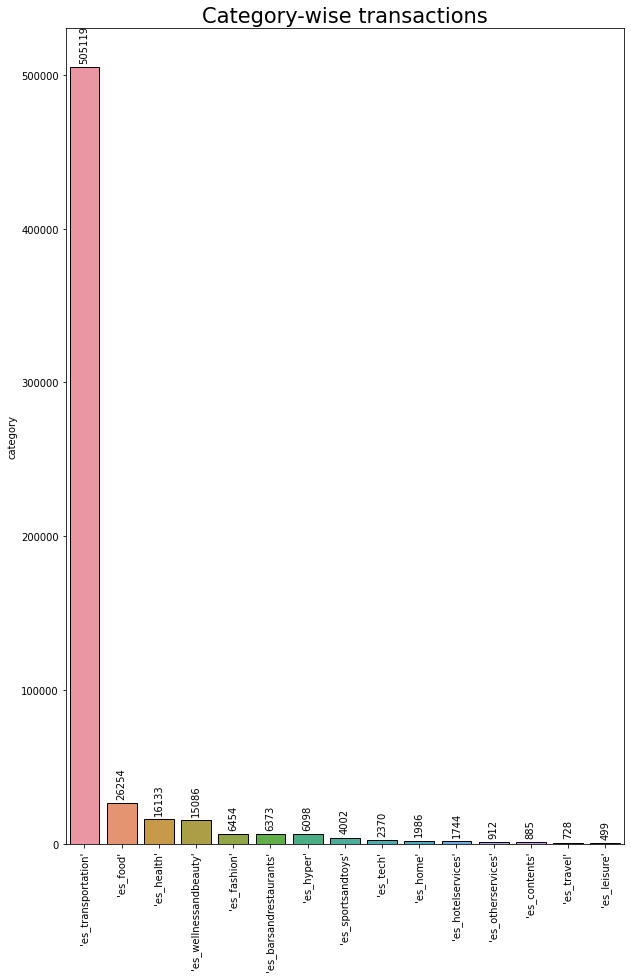

In [48]:
plt.figure(figsize=(10,15))
sns.barplot(dft3.index,dft3.category,data=dft3,ec="black")
plt.title("Category-wise transactions",fontsize=21)
plt.xticks(rotation=90)
addlabels_1(dft3.index,dft3.category)

In [49]:
# Note:  The two largest categories (es_transportation and es_food) have absolutely no fraud .....

### amount

In [50]:
dft[['amount']].describe()


,amount
count,594643.000000
mean,37.890135
std,111.402831
min,0.000000
25%,13.740000
50%,26.900000
75%,42.540000
max,8329.960000


In [51]:
trans_fraud[['amount']].describe()


,amount
count,7200.000000
mean,530.926551
std,835.587112
min,0.030000
25%,159.980000
50%,319.175000
75%,548.977500
max,8329.960000


In [52]:
# The higher amount the higher the likelihood of being fraud

# Advanced EDA

### Related cases not identified as fraud

In [53]:
trans_benign = dft[dft['fraud'] == 0]

indicators = []

for i, element in enumerate( trans_fraud):
    case = trans_fraud.iloc[i]
    x = trans_benign[(trans_benign['merchant'] == case['merchant']) & (
        trans_benign['customer'] == case['customer'])]
    indicators.append(x.index)

print(len(indicators))

print (indicators)


10
[Int64Index([17015], dtype='int64'), Int64Index([247317, 369060, 398912], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([98011], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([170375, 210412], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([], dtype='int64')]


In [54]:
# not enough cases to be relevant

### Cases with multiple transactions

In [55]:
indicators = []

for i, element in enumerate(trans_fraud):
    case = trans_fraud.iloc[i]
    x = trans_fraud[(trans_fraud['merchant'] == case['merchant']) & (
        trans_fraud['customer'] == case['customer'])]
    indicators.append(x.index)

print(len(indicators))

print(indicators)


10
[Int64Index([88, 853, 3906, 37947], dtype='int64'), Int64Index([89, 245420, 357436, 432259], dtype='int64'), Int64Index([434, 53059], dtype='int64'), Int64Index([435], dtype='int64'), Int64Index([553], dtype='int64'), Int64Index([554], dtype='int64'), Int64Index([   604,   1005,   2362,   9972, 100096, 148706, 213295, 219350,
            232730, 289310, 310188, 350137, 362736, 401290, 402421],
           dtype='int64'), Int64Index([   605,   1004,   5536,  12128,  17660,  20461,  21918,  29605,
             44048,  46954,  50993,  58021,  58406,  60908,  60909,  71699,
             80850,  91297,  94326, 102764, 107053, 111507, 111594, 118670,
            142176, 142177, 173500, 176208, 198625, 214869, 248193, 283599,
            325489, 335847, 346585, 364248, 429699, 429700],
           dtype='int64'), Int64Index([801], dtype='int64'), Int64Index([802, 82502], dtype='int64')]


In [56]:
# not enough cases to be relevant

# => we can drop 'step'

# Conclusions:

In [74]:
# (4) Choose the label and features

labelDf = dft[['fraud']].values
# features: category, amount


In [58]:
# (5) Feature engineer for data that is
# (a) relevant 
# (b) unique
# (c) correct 
# (d) not missing

irrelevantFeats = [
    'step', # as there are only 20 repetitions
    'customer', # well, everybody can be a victum..
    'age',  # no obvious correllation
    'gender',  # no obvious correllation
    'zipMerchant', # as same for all
    'zipcodeOri',  # as same for all
    'merchant', # probably not a good indicator,     
]

# Drop data that is not a,b,c, or d
dft = dft.drop(irrelevantFeats, axis=1, inplace=False)
dft.head()


,category,amount,fraud
0,'es_transportation',4.55,0
1,'es_transportation',39.68,0
2,'es_transportation',26.89,0
3,'es_transportation',17.25,0
4,'es_transportation',35.72,0


In [59]:
# Use one-hot encoding for nominal

In [80]:
# => one-hot encoding for category
categories = pd.get_dummies(dft.category)
categories.head()


,'es_barsandrestaurants','es_contents','es_fashion','es_food','es_health','es_home','es_hotelservices','es_hyper','es_leisure','es_otherservices','es_sportsandtoys','es_tech','es_transportation','es_travel','es_wellnessandbeauty'
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
dft_data = dft.join(categories).drop('category', axis=1)
dft_data.head()


,amount,fraud,'es_barsandrestaurants','es_contents','es_fashion','es_food','es_health','es_home','es_hotelservices','es_hyper','es_leisure','es_otherservices','es_sportsandtoys','es_tech','es_transportation','es_travel','es_wellnessandbeauty'
0,4.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,39.68,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,26.89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,17.25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35.72,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
# Set features:
featuresDf = dft_data.drop(['fraud'], axis=1, inplace=False).values


In [63]:

# Reduce dimensions of your features

# done above

In [64]:
# (6) Confirm data is ready with further exploratory analysis

In [84]:
# (7) Training, Testing (and/or Validation) data split 

# for example, 60/20/20

# Training we have 60% and 40% for test
trainF, testF, trainL, testL = train_test_split(
    featuresDf, labelDf, test_size=0.4, random_state=42)

# Divide the test into two parts: 50% for test and 50% for validation
testF, valF, testL, valL = train_test_split(
    testF, testL, test_size=0.5, random_state=42)


In [66]:
# (7.b) If using Deep Learning, building the model

# Add Input Layer
# Add Hidden Layers
# Add Output

In [67]:
# (8) Training the Machine Learning Model (i.e, Fitting the Model)

In [68]:
# (9) Evaluate the model metrics for Training (and/or Validation) data

In [69]:
# (10) Evaluate the model metris for Testing data


# If metrics are poor, optimize either (a) the data, (b) the hyperpamaters

In [70]:
# (11) Use the model for prediction

In [71]:
# (12) Write final predicted data  (e.g, to CSV or JSON, etc.)